In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from matplotlib2tikz import save as tikz_save

%reload_ext autoreload
%autoreload 2


In [2]:
# Test projection function
theta = np.array([1, 1, 1])
thetaProj = proj(theta)
print(thetaProj)

[ 0.57635027  0.57635027  0.57635027]


In [3]:
# Test distance function
theta1 = np.array([0.5, 0, 0])
theta2 = np.array([0, 0.5, 0])
# dist = distance(theta1,theta2, mode = 'Riemannian')
dist = distance(theta1,theta2)
print(dist) # test distance function

0.5


# Part A: Rock-Paper-Scissors(-Lizard-Spock) Data

We simulate different scenarios for matchups with rock-paper-scissors or rock-paper-scissors-lizard-spock data.

In [ ]:
# plotting function for rock paper scissors data
def model_plot(model, filename):
    ax = plt.axes()
    ax.arrow(model.chests[0,0], model.chests[0,1], model.blades[0,0] - model.chests[0,0], 
             model.blades[0,1] - model.chests[0,1], fc="k", ec="k", head_width=0.1, head_length=0.1)
    ax.arrow(model.chests[1,0], model.chests[1,1], model.blades[1,0] - model.chests[1,0], 
             model.blades[1,1] - model.chests[1,1], fc="k", ec="b", head_width=0.1, head_length=0.1)
    ax.arrow(model.chests[2,0], model.chests[2,1], model.blades[2,0] - model.chests[2,0], 
             model.blades[2,1] - model.chests[2,1], fc="k", ec="r", head_width=0.1, head_length=0.1)
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    tikz_save(filename)
#     plt.savefig(filename,dpi=200)
    plt.show()

In [ ]:
# Generate artificial data for rock paper scissors
# 0 = rock, 1 = scissors, 2 = paper
#
# simulate 3000 games per results in the paper

D = [(1,0,0,1000), (2,1,0,1000), (0,2,0,1000)]

# Train for rock paper scissors data
RPS = blade_chest(3,2, bias = False)
iterNum = 5000
alpha = 1e-4

for i in range(iterNum):
#     datapoint = np.random.randint(0,high = 3)
    playerA, playerB, na, nb = D[i%3]
    RPS.SGD_optimizer(playerA, playerB, (na,nb), alpha, mode = 'Euclidean', reg = 1e-2)

model_plot(RPS, '../Figures/tikzFigs/RPS_Euclidean.tex')


In [ ]:
# Generate artificial data for rock paper scissors
# 0 = rock, 1 = scissors, 2 = paper
#
# simulate 3000 games per results in the paper

D = [(1,0,0,1000), (2,1,0,1000), (0,2,0,1000)]

# Train for rock paper scissors data
RPS = blade_chest(3,2, bias = False)
iterNum = 5000
alpha = 1e-4

for i in range(iterNum):
#     datapoint = np.random.randint(0,high = 3)
    playerA, playerB, na, nb = D[i%3]
    RPS.SGD_optimizer(playerA, playerB, (na,nb), alpha, mode = 'Riemannian', reg = 1e-2)

model_plot(RPS, '../Figures/tikzFigs/RPS_Riemannian.tex')


In [ ]:
# Rock-Paper-Scissors with optimizing over single games
# 0 = rock, 1 = scissors, 2 = paper
#
# Create matchup data set D2
D2 = [(1,0,0,1), (2,1,0,1), (0,2,0,1)]

# Train for rock paper scissors data
RPS2 = blade_chest(3,2, bias = False)
iterNum = 5000
alpha = 1e-2

for i in range(iterNum):
#     datapoint = np.random.randint(0,high = 3)
    playerA, playerB, na, nb = D2[i%3]
    RPS2.SGD_optimizer(playerA, playerB, (na,nb), alpha, mode = 'Riemannian', reg = 1e-2)

model_plot(RPS2, '../Figures/tikzFigs/RPS2_Riemannian.tex')
# model_plot(RPS2, '../Figures/RPS2_Riemannian.png')


In [ ]:
def model_plot2(model, filename):
    # for plotting rock-paper-scissors-lizard-spock models
    ax = plt.axes()
    ax.arrow(model.chests[0,0], model.chests[0,1], model.blades[0,0] - model.chests[0,0], 
             model.blades[0,1] - model.chests[0,1], fc="k", ec="k", head_width=0.1, head_length=0.1)
    ax.arrow(model.chests[1,0], model.chests[1,1], model.blades[1,0] - model.chests[1,0], 
             model.blades[1,1] - model.chests[1,1], fc="k", ec="b", head_width=0.1, head_length=0.1)
    ax.arrow(model.chests[2,0], model.chests[2,1], model.blades[2,0] - model.chests[2,0], 
             model.blades[2,1] - model.chests[2,1], fc="k", ec="r", head_width=0.1, head_length=0.1)
    ax.arrow(model.chests[3,0], model.chests[3,1], model.blades[3,0] - model.chests[3,0], 
             model.blades[3,1] - model.chests[3,1], fc="k", ec="g", head_width=0.1, head_length=0.1)
    ax.arrow(model.chests[4,0], model.chests[4,1], model.blades[4,0] - model.chests[4,0], 
             model.blades[4,1] - model.chests[4,1], fc="k", ec="m", head_width=0.1, head_length=0.1)
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    tikz_save(filename)
#     plt.savefig(filename,dpi=200)
    plt.show()

In [ ]:
### Rock Paper Scissors Lizard Spock
# 
# From popular show "The Big Bang Theory"
# Rules outlined at: http://bigbangtheory.wikia.com/wiki/Rock_Paper_Scissors_Lizard_Spock?file=RPSLS.png

# Generate artificial data for rock paper scissors
# 0 = rock, 1 = paper, 2 = scissors, 3 = lizard, 4 = Spock 
#
# simulate 1000 games between each player per the paper

# Create matchup data set
D_spock = [(0,1,0,1000), (0,2,1000,0), (0,3,1000,0), (0,4,0,1000), (1,2,0,1000), (1,3,0,1000), (1,4,1000,0),
          (2,3,1000,0), (2,4,0,1000), (3,4,1000,0)]

# Run optimization on members of D
# Train for rock paper scissors data
RPSLS = blade_chest(5,2, bias = False)
iterNum = int(5e3)
alpha = 1e-3
mode = 'Riemannian'

for i in range(iterNum):
    datapoint = np.random.randint(0,high = 10)
    playerA, playerB, na, nb = D_spock[datapoint]
    RPSLS.SGD_optimizer(playerA, playerB, (na,nb), alpha, mode = mode, reg = 1e-2)

model_plot2(RPSLS, '../Figures/tikzFigs/RPSLS_'+mode+'.tex')

# model_plot2(RPSLS, '../Figures/RPSLS_Euclidean.png')


In [ ]:
D_spock = [(0,1,0,1), (0,2,1,0), (0,3,1,0), (0,4,0,1), (1,2,0,1), (1,3,0,1), (1,4,1,0),
          (2,3,1,0), (2,4,0,1), (3,4,1,0)]

# Run optimization for individual games
# Train for rock paper scissors data
RPSLS2 = blade_chest(5,2, bias = False)
iterNum = int(1e4)
alpha = 1e-3

for i in range(iterNum):
    datapoint = np.random.randint(0,high = 10)
    playerA, playerB, na, nb = D_spock[datapoint]
    RPSLS2.SGD_optimizer(playerA, playerB, (na,nb), alpha, mode = 'Riemannian', reg = 1e-3)


model_plot2(RPSLS2, '../Figures/tikzFigs/RPSLS_Riemannian.tex')
# model_plot2(RPSLS2, '../Figures/RPSLS2_Riemannian.png')

# Part B: DoTA Data
Data from popular video game *Defense of the Ancients*

In [81]:
# Load dataset

numPlayers, numGames, D_DoTA_train, D_DoTA_test = data_parse('../Datasets/dota/dota.txt')

In [83]:
# Do optimization over set D

modes = ['Euclidean','Riemannian']
# modes = ['Euclidean']
numPlayers = 757
numTrain = len(D_DoTA_train)
# dims = [2, 10, 100]
dims = [2, 5, 10, 25, 50, 100, 150, 200, 250, 300]
epochNum = 25
alpha = 1e-2
reg = 1e-3

train_acc_euc = np.zeros(len(dims))
test_acc_euc = np.zeros(len(dims))

train_acc_rie = np.zeros(len(dims))
test_acc_rie = np.zeros(len(dims))

for mode in modes:
    for j in range(len(dims)):
        DoTA = blade_chest(numPlayers, dims[j])
        
        for i in range(epochNum*numTrain):
            if mode == 'Riemannian' and (i < 10*numTrain):
                LR = alpha / 10
            else:
                LR = alpha
                
            datapoint = np.random.randint(0, high = numTrain)
            playerA, playerB, na, nb = D_DoTA_train[datapoint]
            DoTA.SGD_optimizer(playerA, playerB, (na,nb), LR, mode = mode, reg = reg)
        
        
        if mode =='Riemannian':
            train_acc_rie[j] = DoTA.accuracy(D_DoTA_train, mode = mode)
            test_acc_rie[j] = DoTA.accuracy(D_DoTA_test, mode = mode)
        else:
            train_acc_euc[j] = DoTA.accuracy(D_DoTA_train, mode = mode)
            test_acc_euc[j] = DoTA.accuracy(D_DoTA_test, mode = mode)


In [84]:
# Train Bradley-Terry Model for dataset
numTrain = len(D_DoTA_train)
epochNum = 10
alpha = 5e-2

train_acc_BT = np.zeros(len(dims))
test_acc_BT = np.zeros(len(dims))

DoTA = blade_chest(numPlayers, 2, BT = True)

# training loop
for i in range(epochNum*numTrain):
    datapoint = np.random.randint(0, high = numTrain)
    playerA, playerB, na, nb = D_DoTA_train[datapoint]
    DoTA.SGD_optimizer(playerA, playerB, (na,nb), alpha, reg = reg)

        
train_acc_BT = DoTA.accuracy(D_DoTA_train)
train_acc_BT = train_acc_BT*np.ones(len(dims))

test_acc_BT = DoTA.accuracy(D_DoTA_test)
test_acc_BT = test_acc_BT*np.ones(len(dims))


In [85]:
# Calculate naive prediction
DoTA = blade_chest(numPlayers, 1)
DoTA.naive_train(numPlayers, D_DoTA_train)

train_acc_naive = DoTA.naive_eval(D_DoTA_train)
train_acc_naive = train_acc_naive*np.ones(len(dims))
test_acc_naive = DoTA.naive_eval(D_DoTA_test)
test_acc_naive = test_acc_naive*np.ones(len(dims))

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


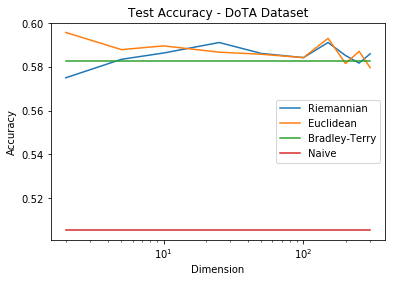

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


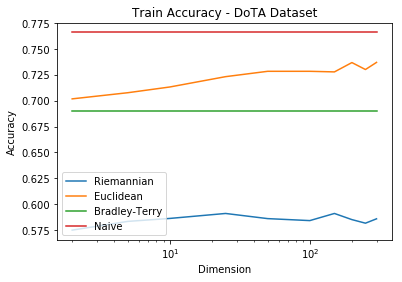

In [86]:
ax = plt.axes()
ax.semilogx(dims, test_acc_rie, label='Riemannian')
ax.semilogx(dims, test_acc_euc, label='Euclidean')
ax.semilogx(dims, test_acc_BT, label='Bradley-Terry')
ax.semilogx(dims, test_acc_naive, label='Naive')
plt.title('Test Accuracy - DoTA Dataset')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.legend()
tikz_save('../Figures/tikzFigs/DoTA_test.tex')
plt.show()

ax = plt.axes()
ax.semilogx(dims, test_acc_rie, label='Riemannian')
ax.semilogx(dims, train_acc_euc, label='Euclidean')
ax.semilogx(dims, train_acc_BT, label='Bradley-Terry')
ax.semilogx(dims, train_acc_naive, label='Naive')
plt.title('Train Accuracy - DoTA Dataset')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.legend()
tikz_save('../Figures/tikzFigs/DoTA_train.tex')
plt.show()


# Part C: Starcraft Datasets
Evaluated datasets for *StarCraft II: Wings of Liberty* and *StarCraft II: Heart of the Swarm*.

In [73]:
# Load dataset
numPlayers, numGames, D_HoTS_train, D_HoTS_test = data_parse('../Datasets/starcraft/HoTS.txt')

In [74]:
# Do optimization over set D

modes = ['Euclidean','Riemannian']
# modes = ['Euclidean']

numTrain = len(D_HoTS_train)
dims = [2, 5, 10, 25, 50, 100, 150, 200, 250, 300]
epochNum = 25
burnIn = 5
alpha = 1e-2
reg = 1e-2

train_acc_euc = np.zeros(len(dims))
test_acc_euc = np.zeros(len(dims))

train_acc_rie = np.zeros(len(dims))
test_acc_rie = np.zeros(len(dims))

for mode in modes:
    for j in range(len(dims)):
        HoTS = blade_chest(numPlayers, dims[j])
        
        # training loop
        for i in range(epochNum*numTrain):
            if mode == 'Riemannian' and (i < burnIn*numTrain):
                LR = alpha / 10
            else:
                LR = alpha
                
            datapoint = np.random.randint(0, high = numTrain)
            playerA, playerB, na, nb = D_HoTS_train[datapoint]
            HoTS.SGD_optimizer(playerA, playerB, (na,nb), LR, mode = mode, reg = reg)
        
        
        if mode=='Riemannian':
            train_acc_rie[j] = HoTS.accuracy(D_HoTS_train, mode = mode)
            test_acc_rie[j] = HoTS.accuracy(D_HoTS_test, mode = mode)
        else:
            train_acc_euc[j] = HoTS.accuracy(D_HoTS_train, mode = mode)
            test_acc_euc[j] = HoTS.accuracy(D_HoTS_test, mode = mode)
            

In [78]:
# Train Bradley-Terry Model for dataset

numTrain = len(D_HoTS_train)
epochNum = 10
alpha = 5e-2

train_acc_BT = np.zeros(len(dims))
test_acc_BT = np.zeros(len(dims))

HoTS = blade_chest(numPlayers, 2, BT = True)

# training loop
for i in range(epochNum*numTrain):
    datapoint = np.random.randint(0, high = numTrain)
    playerA, playerB, na, nb = D_HoTS_train[datapoint]
    HoTS.SGD_optimizer(playerA, playerB, (na,nb), alpha, reg = reg)

        
train_acc_BT = HoTS.accuracy(D_HoTS_train)
train_acc_BT = train_acc_BT*np.ones(len(dims))

test_acc_BT = HoTS.accuracy(D_HoTS_test)
test_acc_BT = test_acc_BT*np.ones(len(dims))


In [79]:
# Calculate naive prediction
HoTS = blade_chest(numPlayers, 1)
HoTS.naive_train(numPlayers, D_HoTS_train)

train_acc_naive = HoTS.naive_eval(D_HoTS_train)
train_acc_naive = train_acc_naive*np.ones(len(dims))
test_acc_naive = HoTS.naive_eval(D_HoTS_test)
test_acc_naive = test_acc_naive*np.ones(len(dims))


Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


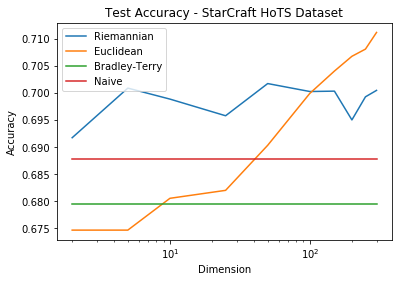

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


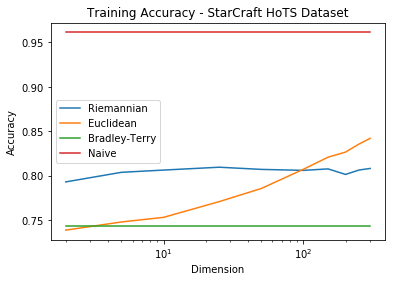

In [80]:
ax = plt.axes()
ax.semilogx(dims, test_acc_rie, label='Riemannian')
ax.semilogx(dims, test_acc_euc, label='Euclidean')
ax.semilogx(dims, test_acc_BT, label='Bradley-Terry')
ax.semilogx(dims, test_acc_naive, label='Naive')
plt.title('Test Accuracy - StarCraft HoTS Dataset')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.legend()
tikz_save('../Figures/tikzFigs/HoTS_test.tex')
# plt.savefig('../Figures/HoTS_test_acc.png',dpi=300)
plt.show()

ax = plt.axes()
ax.semilogx(dims, train_acc_rie, label='Riemannian')
ax.semilogx(dims, train_acc_euc, label='Euclidean')
ax.semilogx(dims, train_acc_BT, label='Bradley-Terry')
ax.semilogx(dims, train_acc_naive, label='Naive')
plt.title('Training Accuracy - StarCraft HoTS Dataset')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.legend()
tikz_save('../Figures/tikzFigs/HoTS_train.tex')

# plt.savefig('../Figures/HoTS_train_acc.png',dpi=300)
plt.show()


Run *Starcraft II: Wings of Liberty* dataset.

In [67]:
# Load Wings of Liberty dataset
numPlayers, numGames, D_train, D_test = data_parse('../Datasets/starcraft/WoL.txt')

In [68]:
# Do optimization over set D

modes = ['Euclidean','Riemannian']

numTrain = len(D_train)
dims = [2, 5, 10, 25, 50, 100, 150, 200, 250, 300]
epochNum = 25
alpha = 1e-2
reg = 1e-2
burnIn = 5

train_acc_euc = np.zeros(len(dims))
test_acc_euc = np.zeros(len(dims))

train_acc_rie = np.zeros(len(dims))
test_acc_rie = np.zeros(len(dims))

for mode in modes:
    for j in range(len(dims)):
        WoL = blade_chest(numPlayers, dims[j])
        
        # training loop
        for i in range(epochNum*numTrain):
            if mode == 'Riemannian' and (i < 5*numTrain):
                LR = alpha / 10
            else:
                LR = alpha
                
            datapoint = np.random.randint(0, high = numTrain)
            playerA, playerB, na, nb = D_train[datapoint]
            WoL.SGD_optimizer(playerA, playerB, (na,nb), LR, mode = mode, reg = reg)
        
        
        if mode=='Riemannian':
            train_acc_rie[j] = WoL.accuracy(D_train, mode = mode)
            test_acc_rie[j] = WoL.accuracy(D_test, mode = mode)
        else:
            train_acc_euc[j] = WoL.accuracy(D_train, mode = mode)
            test_acc_euc[j] = WoL.accuracy(D_test, mode = mode)
            

In [69]:
# Train Bradley-Terry Model for dataset
numTrain = len(D_train)
epochNum = 25
alpha = 5e-2

train_acc_BT = np.zeros(len(dims))
test_acc_BT = np.zeros(len(dims))

WoL = blade_chest(numPlayers, 2, BT = True)

# training loop
for i in range(epochNum*numTrain):
    datapoint = np.random.randint(0, high = numTrain)
    playerA, playerB, na, nb = D_train[datapoint]
    WoL.SGD_optimizer(playerA, playerB, (na,nb), alpha, reg = reg)

        
train_acc_BT = WoL.accuracy(D_train)
train_acc_BT = train_acc_BT*np.ones(len(dims))

test_acc_BT = WoL.accuracy(D_test)
test_acc_BT = test_acc_BT*np.ones(len(dims))


In [71]:
# Calculate naive prediction
WoL = blade_chest(numPlayers, 1)
WoL.naive_train(numPlayers, D_train)

train_acc_naive = WoL.naive_eval(D_train)
train_acc_naive = train_acc_naive*np.ones(len(dims))
test_acc_naive = WoL.naive_eval(D_test)
test_acc_naive = test_acc_naive*np.ones(len(dims))


Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


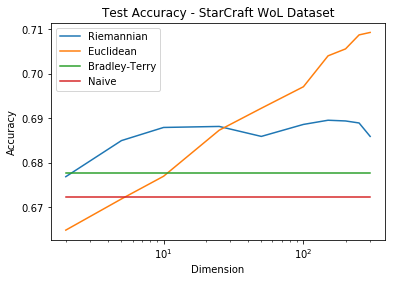

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


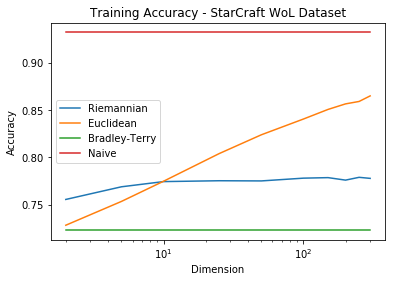

In [72]:
ax = plt.axes()
ax.semilogx(dims, test_acc_rie, label='Riemannian')
ax.semilogx(dims, test_acc_euc, label='Euclidean')
ax.semilogx(dims, test_acc_BT, label='Bradley-Terry')
ax.semilogx(dims, test_acc_naive, label='Naive')
plt.title('Test Accuracy - StarCraft WoL Dataset')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.legend()
tikz_save('../Figures/tikzFigs/WoL_test.tex')
# plt.savefig('../Figures/HoTS_test_acc.png',dpi=300)
plt.show()

ax = plt.axes()
ax.semilogx(dims, train_acc_rie, label='Riemannian')
ax.semilogx(dims, train_acc_euc, label='Euclidean')
ax.semilogx(dims, train_acc_BT, label='Bradley-Terry')
ax.semilogx(dims, train_acc_naive, label='Naive')
plt.title('Training Accuracy - StarCraft WoL Dataset')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.legend()
tikz_save('../Figures/tikzFigs/WoL_train.tex')

# plt.savefig('../Figures/HoTS_train_acc.png',dpi=300)
plt.show()


# Part D: Professional Sports
 Below we show results for the ATP dataset.

In [56]:
# Load dataset
numPlayers, numGames, D_train, D_test = data_parse('../Datasets/tennis/tennis.txt')

In [58]:
# Do optimization over set D

modes = ['Euclidean','Riemannian']

numTrain = len(D_train)
dims = [2, 5, 10, 25, 50, 100, 150, 200, 250, 300]
epochNum = 25
alpha = 1e-2
reg = 1e-2
burnIn = 5

train_acc_euc = np.zeros(len(dims))
test_acc_euc = np.zeros(len(dims))

train_acc_rie = np.zeros(len(dims))
test_acc_rie = np.zeros(len(dims))

for mode in modes:
    for j in range(len(dims)):
        ATP = blade_chest(numPlayers, dims[j])
        
        # training loop
        for i in range(epochNum*numTrain):
            if mode == 'Riemannian' and (i < burnIn*numTrain):
                LR = alpha / 10
            else:
                LR = alpha
                
            datapoint = np.random.randint(0, high = numTrain)
            playerA, playerB, na, nb = D_train[datapoint]
            ATP.SGD_optimizer(playerA, playerB, (na,nb), LR, mode = mode, reg = reg)
        
        
        if mode=='Riemannian':
            train_acc_rie[j] = ATP.accuracy(D_train, mode = mode)
            test_acc_rie[j] = ATP.accuracy(D_test, mode = mode)
        else:
            train_acc_euc[j] = ATP.accuracy(D_train, mode = mode)
            test_acc_euc[j] = ATP.accuracy(D_test, mode = mode)
            

In [63]:
# Train Bradley-Terry Model for ATP dataset
numTrain = len(D_train)
epochNum = 10
alpha = 1e-2

train_acc_BT = np.zeros(len(dims))
test_acc_BT = np.zeros(len(dims))

ATP = blade_chest(numPlayers, 2, BT = True)

# training loop
for i in range(epochNum*numTrain):
    datapoint = np.random.randint(0, high = numTrain)
    playerA, playerB, na, nb = D_train[datapoint]
    ATP.SGD_optimizer(playerA, playerB, (na,nb), alpha, reg = reg)

        
train_acc_BT = ATP.accuracy(D_train)
train_acc_BT = train_acc_BT*np.ones(len(dims))

test_acc_BT = ATP.accuracy(D_test)
test_acc_BT = test_acc_BT*np.ones(len(dims))


In [64]:
# Calculate naive prediction
ATP = blade_chest(numPlayers, 1)
ATP.naive_train(numPlayers, D_train)

train_acc_naive = ATP.naive_eval(D_train)
train_acc_naive = train_acc_naive*np.ones(len(dims))
test_acc_naive = ATP.naive_eval(D_test)
test_acc_naive = test_acc_naive*np.ones(len(dims))


Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


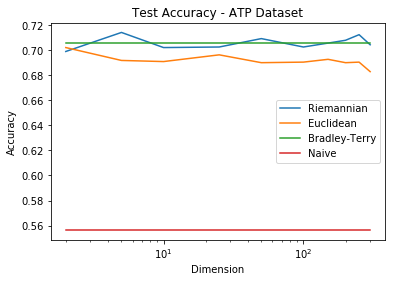

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


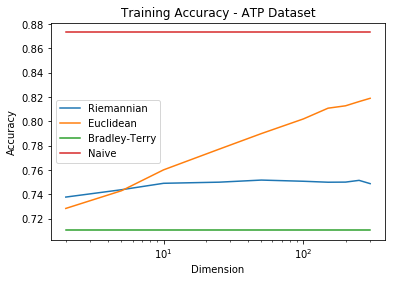

In [66]:
ax = plt.axes()
ax.semilogx(dims, test_acc_rie, label='Riemannian')
ax.semilogx(dims, test_acc_euc, label='Euclidean')
ax.semilogx(dims, test_acc_BT, label='Bradley-Terry')
ax.semilogx(dims, test_acc_naive, label='Naive')
plt.title('Test Accuracy - ATP Dataset')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.legend()
tikz_save('../Figures/tikzFigs/tennis_test.tex')
# plt.savefig('../Figures/HoTS_test_acc.png',dpi=300)
plt.show()

ax = plt.axes()
ax.semilogx(dims, train_acc_rie, label='Riemannian')
ax.semilogx(dims, train_acc_euc, label='Euclidean')
ax.semilogx(dims, train_acc_BT, label='Bradley-Terry')
ax.semilogx(dims, train_acc_naive, label='Naive')
plt.title('Training Accuracy - ATP Dataset')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.legend()
tikz_save('../Figures/tikzFigs/tennis_train.tex')

# plt.savefig('../Figures/HoTS_train_acc.png',dpi=300)
plt.show()
